In [2]:
from osgeo import gdal, ogr, osr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os



In [3]:
dem = gdal.Open("dem.tif")
dem is None
band = dem.GetRasterBand(1)
gt = dem.GetGeoTransform()
igt = gdal.InvGeoTransform(gt)
full_dem = band.ReadAsArray()


In [14]:
east,south = gdal.ApplyGeoTransform(gt,dem.RasterXSize,dem.RasterYSize) # prawy dolny
west,north = gdal.ApplyGeoTransform(gt,0,0) #lewy górny
extent=[west,east,south,north]


In [4]:
line = ogr.Open("linia_przekrojowa.gpkg")
layer = line.GetLayer(0)
feature = layer.GetFeature(1)
points = feature.geometry().GetPoints()
points = np.array(points)

In [5]:
zvalues = []
for point in points:
    mat = gdal.ApplyGeoTransform(igt,*point)
    z = band.ReadAsArray(*mat,1,1).flatten()
    zvalues.append(z)
zvalues = np.array(zvalues).flatten()

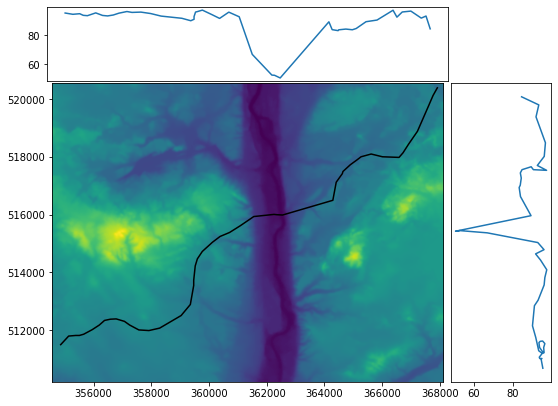

In [45]:
gridSpec = {"width_ratios":(4,1), 
            "height_ratios":(1,4),
            "wspace":0.01,"hspace":0.01}
figsize = (dem.RasterXSize/50,dem.RasterYSize/50)
fig, axes = plt.subplots(2,2,figsize=figsize,gridspec_kw=gridSpec)
axes[1][0].imshow(full_dem,extent=extent)
axes[1][0].plot(*points.T,color="#000")
axes[0][0].plot(points.T[0],zvalues)
axes[1][1].plot(zvalues,points.T[1])

axes[0][1].set_axis_off()
axes[0][0].xaxis.set_visible(False)
axes[1][1].yaxis.set_visible(False)

